In [11]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRegressor

In [12]:
# Load preprocessed data (assumes a CSV file named 'prepared_data.csv' in the same folder)
data = pd.read_csv('codeforces_feature_dataset.csv')

# Assume the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [13]:
X.columns


Index(['user_handle', 'submission_time', 'problem_contestId', 'problem_index',
       'problem_rating', 'rating_diff', 'user_rating', 'user_success_rate',
       'user_total_submissions', 'avg_tag_success_rate', 'time_since_last_sub',
       'recent_sub_count', 'abs_difficulty_offset'],
      dtype='object')

In [22]:
# only this filtered columns allowed
allowed_columns = [
       'problem_rating', 'rating_diff', 'user_rating', 'user_success_rate',
       'user_total_submissions', 'avg_tag_success_rate', 'time_since_last_sub',
       'recent_sub_count', 'abs_difficulty_offset']
encode_columns = ['problem_index']

X = X[allowed_columns]
# X = pd.get_dummies(X, columns=encode_columns, drop_first=True)



In [23]:
X

,problem_rating,rating_diff,user_rating,user_success_rate,user_total_submissions,avg_tag_success_rate,time_since_last_sub,recent_sub_count,abs_difficulty_offset
0,2100.0,274.0,2374.0,0.336095,1931,0.277597,217.0,378,274.0
1,2100.0,274.0,2374.0,0.336095,1931,0.279013,78.0,377,274.0
2,2100.0,274.0,2374.0,0.336095,1931,0.280444,1412.0,376,274.0
3,2100.0,274.0,2374.0,0.336095,1931,0.281891,1964.0,375,274.0
4,2400.0,-26.0,2374.0,0.336095,1931,0.262152,7494.0,374,26.0
...,...,...,...,...,...,...,...,...,...
65909,2200.0,-1011.0,1189.0,0.422680,97,0.391473,198.0,43,1011.0
65910,2200.0,-1011.0,1189.0,0.422680,97,0.412235,2581.0,42,1011.0
65911,1300.0,-111.0,1189.0,0.422680,97,0.436388,28.0,41,111.0
65912,1300.0,-111.0,1189.0,0.422680,97,0.447398,158.0,40,111.0


In [24]:
X.isna().sum()

problem_rating            10454
rating_diff               11088
user_rating                2122
user_success_rate             0
user_total_submissions        0
avg_tag_success_rate       7296
time_since_last_sub          92
recent_sub_count              0
abs_difficulty_offset     11088
dtype: int64

In [26]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Logistic Regression model
model = XGBClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score

# # Evaluate R² score instead of accuracy
# r2 = r2_score(y_test, y_pred)
# print(f"Model R² score: {r2:.2f}")


# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.69


              precision    recall  f1-score   support

           0       0.69      0.77      0.72     10573
           1       0.69      0.60      0.64      9202

    accuracy                           0.69     19775
   macro avg       0.69      0.68      0.68     19775
weighted avg       0.69      0.69      0.69     19775



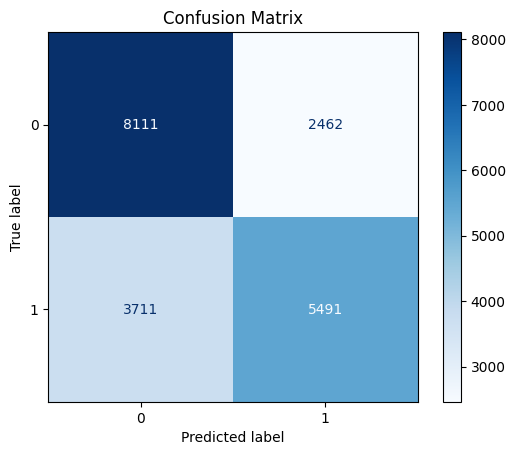

In [21]:
#  print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
